In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
efficiency_data = pd.read_csv('../Data/03_Results/metrics_stations_over_day.csv')


In [4]:
efficiency_data

,Unnamed: 0,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
0,0,"Abbey Orchard Street, Westminster",0,0.068966,0.2,0.131034,49,5.0,3.0,3.0,0.076923,0.046154,0.046154
1,1,"Abbey Orchard Street, Westminster",1,0.068966,0.2,0.131034,50,1.0,1.0,0.0,0.015385,0.015385,0.000000
2,2,"Abbey Orchard Street, Westminster",2,0.068966,0.8,0.731034,49,2.0,5.0,2.0,0.030769,0.076923,0.030769
3,3,"Abbey Orchard Street, Westminster",3,0.068966,0.5,0.431034,47,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,"Abbey Orchard Street, Westminster",4,0.068966,0.2,0.131034,47,1.0,2.0,2.0,0.015385,0.030769,0.030769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,8875,"Wren Street, Holborn",19,0.121212,0.5,0.378788,107,106.0,115.0,170.0,1.630769,1.769231,2.615385
8876,8876,"Wren Street, Holborn",20,0.121212,0.6500000000000001,0.528788,109,63.0,95.0,108.0,0.969231,1.461538,1.661538
8877,8877,"Wren Street, Holborn",21,0.151515,0.5473684210526317,0.395853,114,40.0,85.0,79.0,0.615385,1.307692,1.215385
8878,8878,"Wren Street, Holborn",22,0.151515,0.56,0.408485,116,15.0,71.0,23.0,0.230769,1.092308,0.353846


In [5]:
# # Cap median_fullness_rate to 1 
# efficiency_data['median_fullness_rate'] = efficiency_data['median_fullness_rate'].apply(lambda x: min(x, 1))
# # Recalucalte the fullness deviation
# efficiency_data['fullness_deviation'] = abs(efficiency_data['median_fullness_rate'] - efficiency_data['target_fullness'])
# efficiency_data

In [6]:
#efficiency_data.to_csv('../Data/03_Results/metrics_stations_over_day.csv')

In [7]:
efficiency_data.describe()

,Unnamed: 0,hour,median_fullness_rate,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
count,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000
mean,4439.500000,11.500000,0.300927,0.224579,90.407095,63.598761,63.598761,91.356081,0.978442,0.978442,1.405478
std,2563.579529,6.922576,0.180681,0.149287,27.867047,113.013103,111.145756,161.771887,1.738663,1.709935,2.488798
min,0.000000,0.000000,0.020833,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2219.750000,5.750000,0.160000,0.103377,72.000000,7.000000,7.000000,3.000000,0.107692,0.107692,0.046154
50%,4439.500000,11.500000,0.263158,0.205556,100.000000,37.000000,37.000000,37.000000,0.569231,0.569231,0.569231
75%,6659.250000,17.250000,0.411765,0.326087,113.000000,81.000000,81.000000,116.000000,1.246154,1.246154,1.784615
max,8879.000000,23.000000,1.000000,0.800000,127.000000,5071.000000,4913.000000,4388.000000,78.015385,75.584615,67.507692


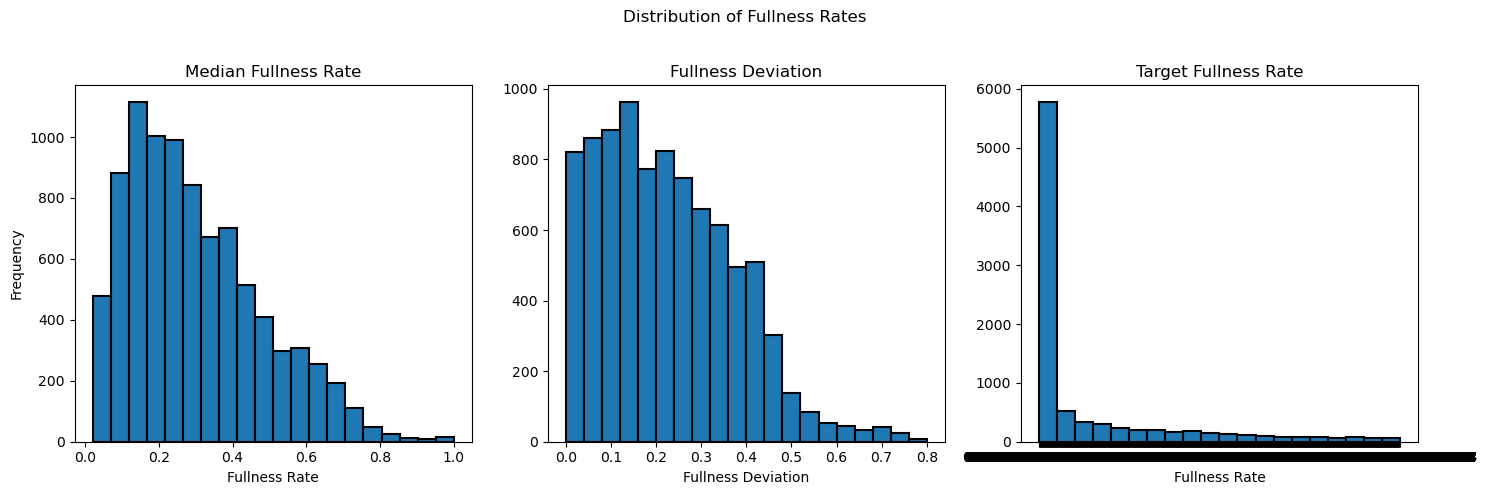

In [8]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Define border properties for the bins
bin_border_color = 'black'
bin_border_width = 1.5

# Plot the histograms with borders around the bins
axs[0].hist(efficiency_data['median_fullness_rate'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[0].set_title('Median Fullness Rate')
axs[0].set_xlabel('Fullness Rate')
axs[0].set_ylabel('Frequency')

axs[1].hist(efficiency_data['fullness_deviation'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[1].set_title('Fullness Deviation')
axs[1].set_xlabel('Fullness Deviation')

axs[2].hist(efficiency_data['target_fullness'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[2].set_title('Target Fullness Rate')
axs[2].set_xlabel('Fullness Rate')

# Add a main title for the entire figure
fig.suptitle('Distribution of Fullness Rates')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

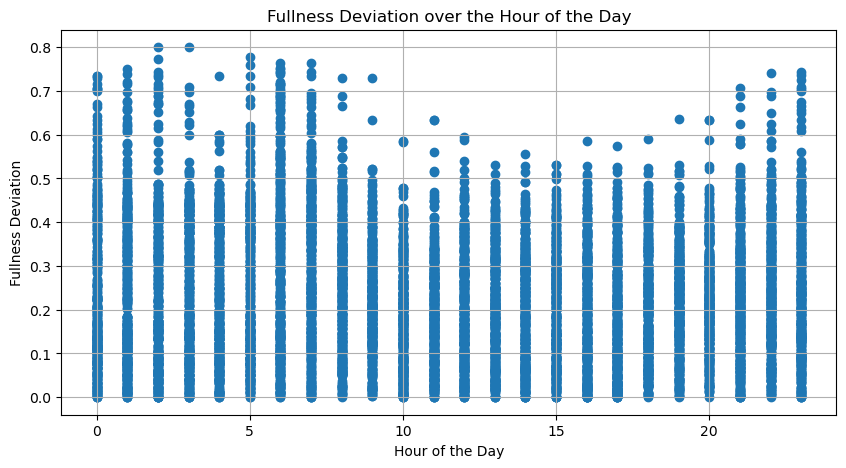

In [9]:
# During what time of the day (hour), was the fullness deviation the highest?
# Plot the fullness deviation over the hour of the day
plt.figure(figsize=(10, 5))
plt.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'])
plt.title('Fullness Deviation over the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fullness Deviation')
plt.grid(True)
plt.show()



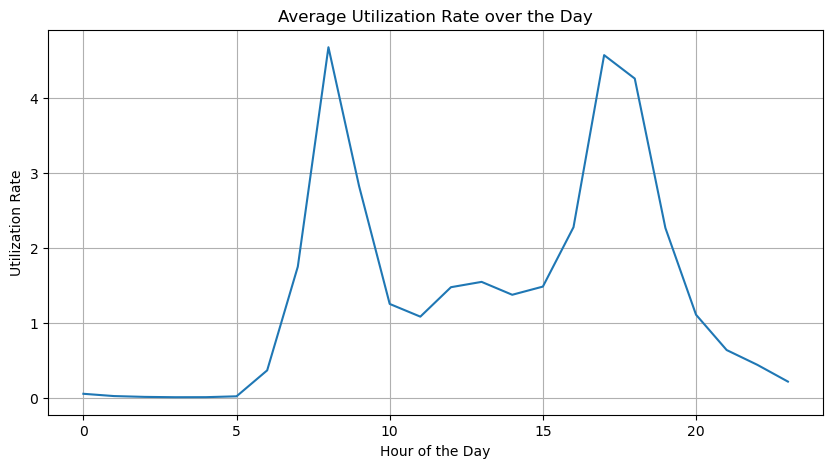

In [10]:
# Plot the average utilization rate over the day
plt.figure(figsize=(10, 5))
plt.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean())
plt.title('Average Utilization Rate over the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Utilization Rate')
plt.grid(True)
plt.show()


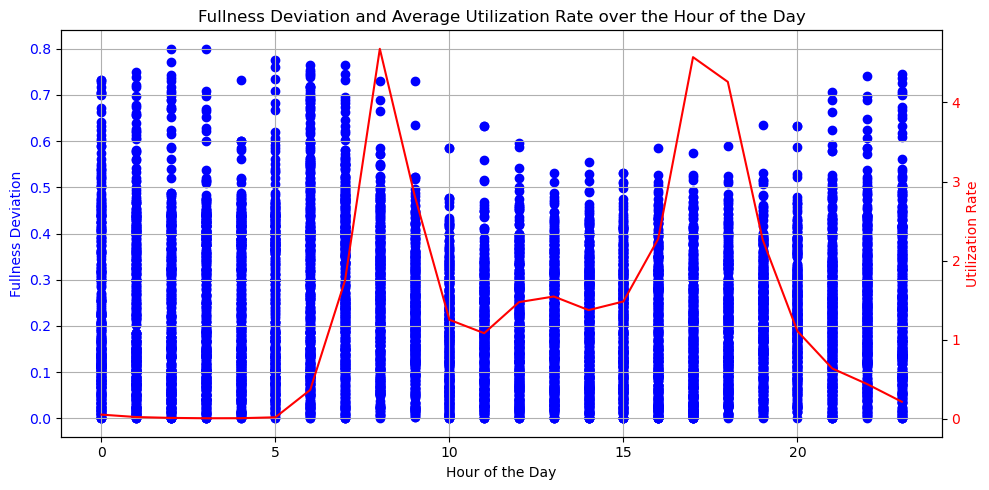

In [11]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Fullness Deviation as a scatter plot
ax1.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'], color='b', label='Fullness Deviation')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Fullness Deviation', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for Utilization Rate
ax2 = ax1.twinx()
ax2.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean(), color='r', label='Utilization Rate')
ax2.set_ylabel('Utilization Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and show the plot
plt.title('Fullness Deviation and Average Utilization Rate over the Hour of the Day')
fig.tight_layout()  # To make sure labels don't overlap
plt.show()

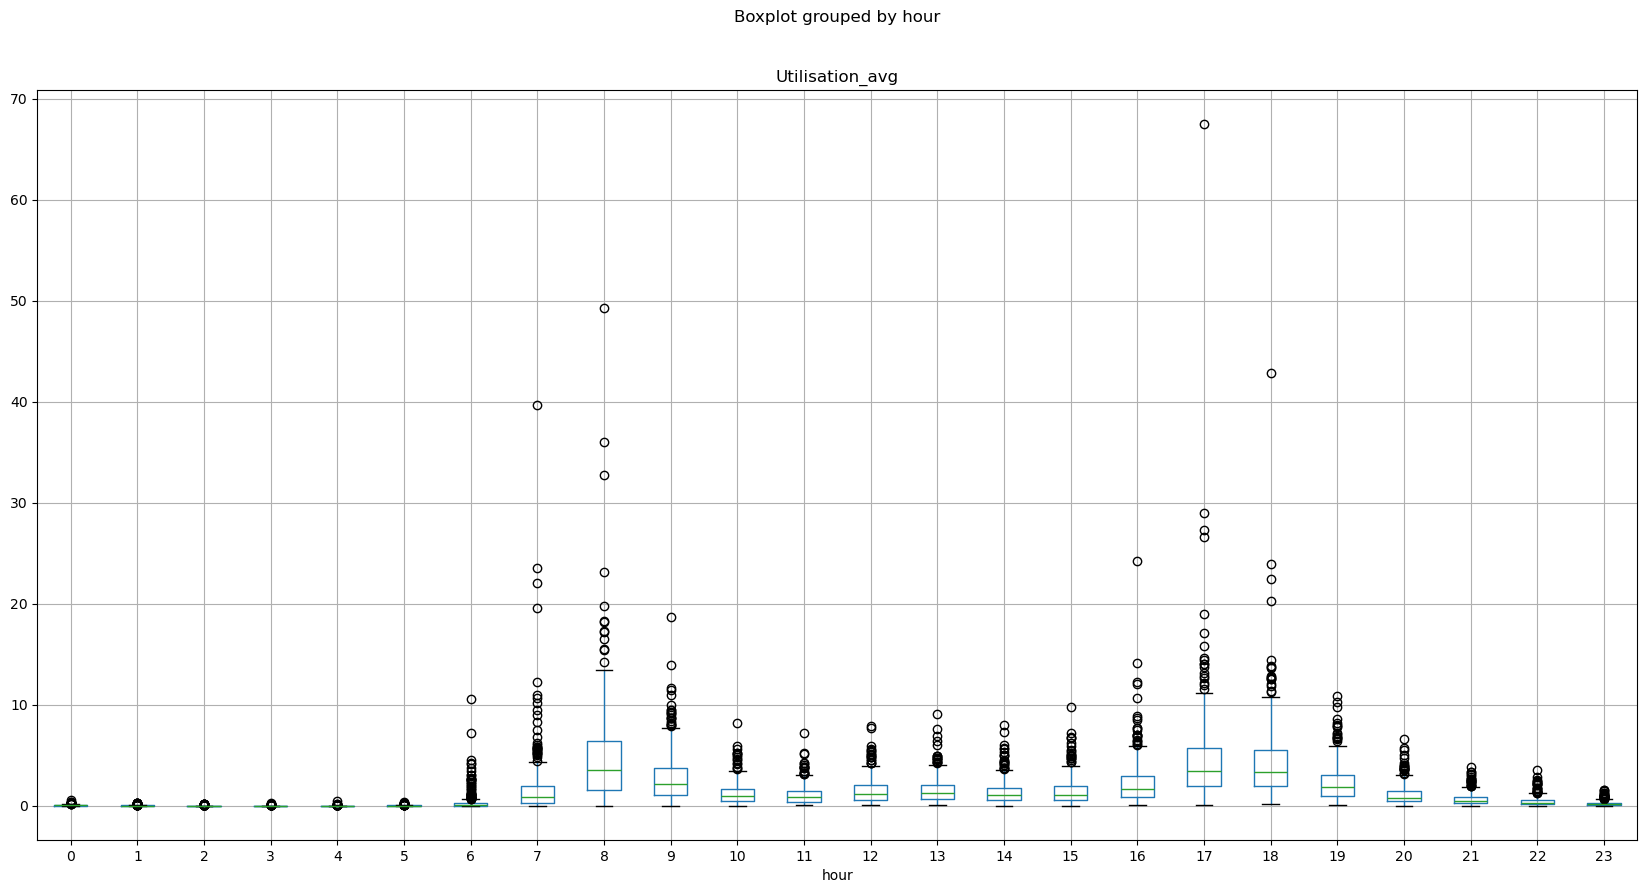

In [12]:
# boxplot of efficiency scores 
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='Utilisation_avg', by='hour', ax=ax)
plt.show()

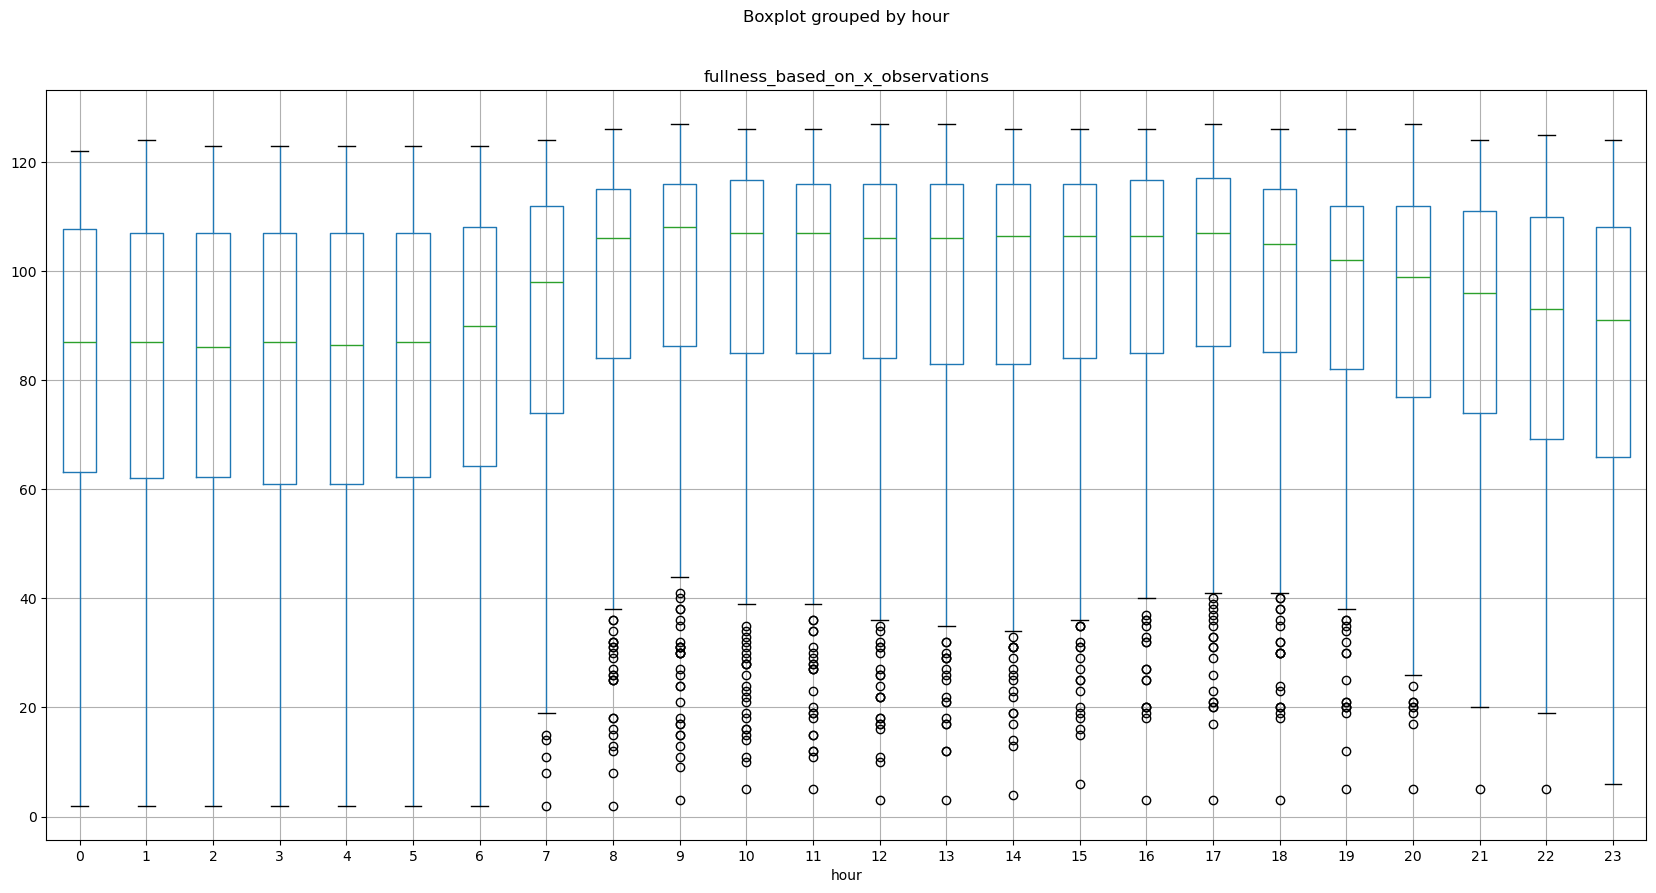

In [13]:
# Plot the distribution of number of observations per hour
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='fullness_based_on_x_observations', by='hour', ax=ax)
plt.show()


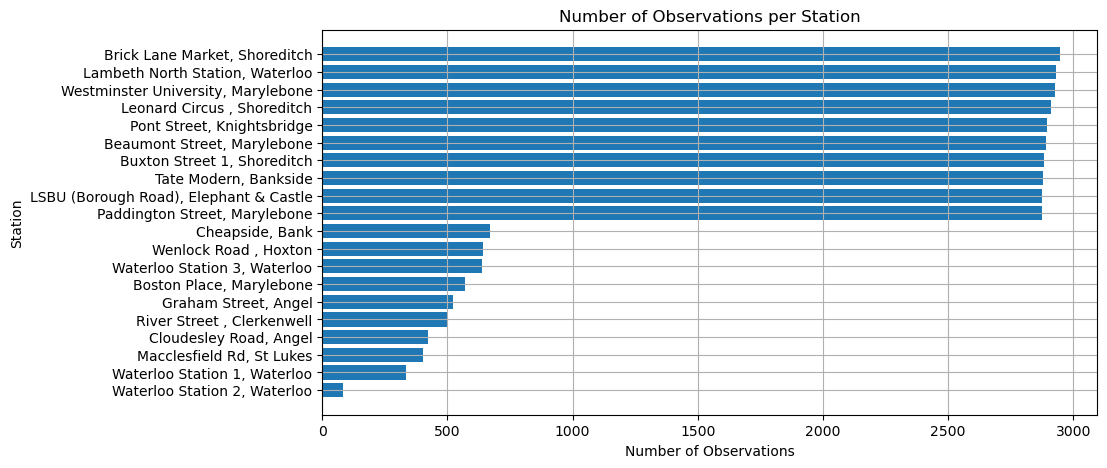

In [14]:
n_observations_per_station = efficiency_data.groupby('station').agg({'fullness_based_on_x_observations': 'sum'})
n_observations_per_station = n_observations_per_station.sort_values(by='fullness_based_on_x_observations', ascending=True)
# Select the 10 first and 10 last stations
n_observations_per_station = pd.concat([n_observations_per_station.head(10), n_observations_per_station.tail(10)])

# Plot the number of observations per station
plt.figure(figsize=(10, 5))
plt.barh(n_observations_per_station.index, n_observations_per_station['fullness_based_on_x_observations'])
plt.title('Number of Observations per Station')
plt.xlabel('Number of Observations')
plt.ylabel('Station')
plt.grid(True)
plt.show()


In [15]:
waterloo_2_data = efficiency_data[efficiency_data['station'] == 'Waterloo Station 2, Waterloo']
waterloo_2_data = waterloo_2_data.sort_values(by='hour')

# Plot the fullness deviation over the hour of the day

# Efffi

In [16]:
efficeincy_data_filter = efficiency_data.copy()

In [17]:
efficeincy_data_filter = efficeincy_data_filter[efficeincy_data_filter['hour'].isin ([8,17])]

In [18]:
efficeincy_data_filter

,Unnamed: 0,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
8,8,"Abbey Orchard Street, Westminster",8,0.068966,0.5313432835820897,0.462378,65,48.0,329.0,233.0,0.738462,5.061538,3.584615
17,17,"Abbey Orchard Street, Westminster",17,0.448276,0.4771300448430494,0.028854,56,301.0,61.0,252.0,4.630769,0.938462,3.876923
32,32,"Abingdon Green, Westminster",8,0.150000,0.4571428571428572,0.307143,84,64.0,233.0,233.0,0.984615,3.584615,3.584615
41,41,"Abingdon Green, Westminster",17,0.500000,0.4571428571428572,0.042857,91,160.0,71.0,165.0,2.461538,1.092308,2.538462
56,56,"Albany Street, The Regent's Park",8,0.370370,0.425,0.054630,34,256.0,44.0,183.0,3.938462,0.676923,2.815385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,8825,"Wormwood Street, Liverpool Street",17,0.750000,0.4142857142857143,0.335714,97,841.0,935.0,1776.0,12.938462,14.384615,27.323077
8840,8840,"Worship Street, Shoreditch",8,0.107843,0.435258358662614,0.327415,108,54.0,425.0,319.0,0.830769,6.538462,4.907692
8849,8849,"Worship Street, Shoreditch",17,0.450980,0.4666666666666667,0.015686,103,446.0,143.0,554.0,6.861538,2.200000,8.523077
8864,8864,"Wren Street, Holborn",8,0.272727,0.4756756756756757,0.202948,121,128.0,122.0,219.0,1.969231,1.876923,3.369231


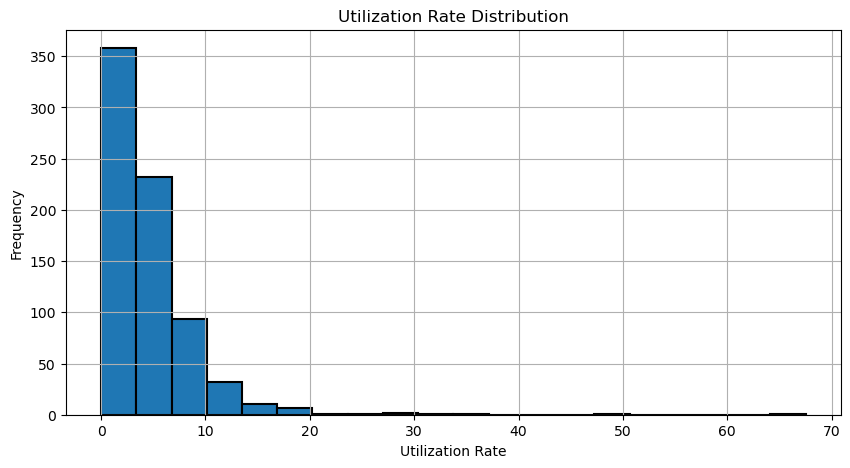

In [19]:
# plot the utilization rate distribuzion
plt.figure(figsize=(10, 5))
plt.hist(efficeincy_data_filter['Utilisation_avg'], bins=20, edgecolor='black', linewidth=1.5)
plt.title('Utilization Rate Distribution')
plt.xlabel('Utilization Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
efficiency_data = pd.read_csv('../Data/03_Results/metrics_stations_over_day.csv')
efficiency_data = efficiency_data[efficiency_data['hour'].isin ([8,17])]

In [21]:
# Get unique stations
stations = efficiency_data['station'].unique()

# Initialize an empty list to store filtered stations
stations_filtered = []

# Loop through each station
for station in stations:
    print(station)
    # Get data for the current station
    station_data = efficiency_data[efficiency_data['station'] == station]
    print(station_data)
    # Check if all utilization values are above 5
    if station_data['Utilisation_avg'].min() > 5:
        stations_filtered.append(station)

print(stations_filtered)

# Filter the original DataFrame based on the filtered stations
efficiency_data_filtered = efficiency_data[efficiency_data['station'].isin(stations_filtered)]

# Display the filtered DataFrame
efficiency_data_filtered


Abbey Orchard Street, Westminster
    Unnamed: 0                            station  hour  median_fullness_rate  \
8            8  Abbey Orchard Street, Westminster     8              0.068966   
17          17  Abbey Orchard Street, Westminster    17              0.448276   

       target_fullness  fullness_deviation  fullness_based_on_x_observations  \
8   0.5313432835820897            0.462378                                65   
17  0.4771300448430494            0.028854                                56   

    pick_up_demand_sum_over_3_months  drop_off_demand_sum_over_3_months  \
8                               48.0                              329.0   
17                             301.0                               61.0   

    utilisation_over_3_months  pick_up_demand_avg  drop_off_demand_avg  \
8                       233.0            0.738462             5.061538   
17                      252.0            4.630769             0.938462   

    Utilisation_avg  
8         

,Unnamed: 0,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
128,128,"Aldersgate Street, Barbican",8,0.500000,0.56,0.060000,108,412.0,360.0,768.0,6.338462,5.538462,11.815385
137,137,"Aldersgate Street, Barbican",17,0.533333,0.5,0.033333,107,284.0,288.0,565.0,4.369231,4.430769,8.692308
152,152,"Allington Street, Victoria",8,0.142857,0.5737024221453291,0.430845,114,291.0,270.0,552.0,4.476923,4.153846,8.492308
161,161,"Allington Street, Victoria",17,0.500000,0.55,0.050000,122,210.0,376.0,563.0,3.230769,5.784615,8.661538
224,224,"Argyle Street, Kings Cross",8,0.711111,0.5990147783251232,0.112096,44,2117.0,177.0,2127.0,32.569231,2.723077,32.723077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,8705,"Whitehall Place, Strand",17,0.315217,0.476923076923077,0.161706,104,416.0,250.0,659.0,6.400000,3.846154,10.138462
8720,8720,"William IV Street, Strand",8,0.192308,0.5746478873239437,0.382340,119,367.0,445.0,808.0,5.646154,6.846154,12.430769
8729,8729,"William IV Street, Strand",17,0.384615,0.5983193277310925,0.213704,122,276.0,411.0,673.0,4.246154,6.323077,10.353846
8816,8816,"Wormwood Street, Liverpool Street",8,0.562500,0.6153846153846154,0.052885,106,839.0,671.0,1506.0,12.907692,10.323077,23.169231


In [22]:
#Get unique stations
stations = efficiency_data['station'].unique()

# Initialize an empty list to store filtered stations
stations_filtered = []

# Loop through each station
for station in stations:
    print(station)
    # Get data for the current station
    station_data = efficiency_data[efficiency_data['station'] == station]
    print(station_data)
    # Check if all utilization values are above 5
    if station_data['fullness_based_on_x_observations'].min() > 0:
        stations_filtered.append(station)

print(stations_filtered)

# Filter the original DataFrame based on the filtered stations
efficiency_data_filtered_again = efficiency_data_filtered[efficiency_data_filtered['station'].isin(stations_filtered)]

# Display the filtered DataFrame
efficiency_data_filtered_again

Abbey Orchard Street, Westminster
    Unnamed: 0                            station  hour  median_fullness_rate  \
8            8  Abbey Orchard Street, Westminster     8              0.068966   
17          17  Abbey Orchard Street, Westminster    17              0.448276   

       target_fullness  fullness_deviation  fullness_based_on_x_observations  \
8   0.5313432835820897            0.462378                                65   
17  0.4771300448430494            0.028854                                56   

    pick_up_demand_sum_over_3_months  drop_off_demand_sum_over_3_months  \
8                               48.0                              329.0   
17                             301.0                               61.0   

    utilisation_over_3_months  pick_up_demand_avg  drop_off_demand_avg  \
8                       233.0            0.738462             5.061538   
17                      252.0            4.630769             0.938462   

    Utilisation_avg  
8         

,Unnamed: 0,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
128,128,"Aldersgate Street, Barbican",8,0.500000,0.56,0.060000,108,412.0,360.0,768.0,6.338462,5.538462,11.815385
137,137,"Aldersgate Street, Barbican",17,0.533333,0.5,0.033333,107,284.0,288.0,565.0,4.369231,4.430769,8.692308
152,152,"Allington Street, Victoria",8,0.142857,0.5737024221453291,0.430845,114,291.0,270.0,552.0,4.476923,4.153846,8.492308
161,161,"Allington Street, Victoria",17,0.500000,0.55,0.050000,122,210.0,376.0,563.0,3.230769,5.784615,8.661538
224,224,"Argyle Street, Kings Cross",8,0.711111,0.5990147783251232,0.112096,44,2117.0,177.0,2127.0,32.569231,2.723077,32.723077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,8705,"Whitehall Place, Strand",17,0.315217,0.476923076923077,0.161706,104,416.0,250.0,659.0,6.400000,3.846154,10.138462
8720,8720,"William IV Street, Strand",8,0.192308,0.5746478873239437,0.382340,119,367.0,445.0,808.0,5.646154,6.846154,12.430769
8729,8729,"William IV Street, Strand",17,0.384615,0.5983193277310925,0.213704,122,276.0,411.0,673.0,4.246154,6.323077,10.353846
8816,8816,"Wormwood Street, Liverpool Street",8,0.562500,0.6153846153846154,0.052885,106,839.0,671.0,1506.0,12.907692,10.323077,23.169231


In [23]:
efficiency_data_filtered_again

,Unnamed: 0,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
128,128,"Aldersgate Street, Barbican",8,0.500000,0.56,0.060000,108,412.0,360.0,768.0,6.338462,5.538462,11.815385
137,137,"Aldersgate Street, Barbican",17,0.533333,0.5,0.033333,107,284.0,288.0,565.0,4.369231,4.430769,8.692308
152,152,"Allington Street, Victoria",8,0.142857,0.5737024221453291,0.430845,114,291.0,270.0,552.0,4.476923,4.153846,8.492308
161,161,"Allington Street, Victoria",17,0.500000,0.55,0.050000,122,210.0,376.0,563.0,3.230769,5.784615,8.661538
224,224,"Argyle Street, Kings Cross",8,0.711111,0.5990147783251232,0.112096,44,2117.0,177.0,2127.0,32.569231,2.723077,32.723077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,8705,"Whitehall Place, Strand",17,0.315217,0.476923076923077,0.161706,104,416.0,250.0,659.0,6.400000,3.846154,10.138462
8720,8720,"William IV Street, Strand",8,0.192308,0.5746478873239437,0.382340,119,367.0,445.0,808.0,5.646154,6.846154,12.430769
8729,8729,"William IV Street, Strand",17,0.384615,0.5983193277310925,0.213704,122,276.0,411.0,673.0,4.246154,6.323077,10.353846
8816,8816,"Wormwood Street, Liverpool Street",8,0.562500,0.6153846153846154,0.052885,106,839.0,671.0,1506.0,12.907692,10.323077,23.169231


In [24]:
morning_data = efficiency_data_filtered_again[efficiency_data_filtered_again['hour'] == 8]
afternoon_data = efficiency_data_filtered_again[efficiency_data_filtered_again['hour'] == 17]

In [25]:
# plot the stations with the highest fullness deviation in the morning descendlingly (top10)
morning_data = morning_data.sort_values(by='fullness_deviation', ascending=False)
morning_data_top15 = morning_data.head(25)


In [26]:
# plot the stations with the highest fullness deviation in the evening descendlingly (top10)
afternoon_data = afternoon_data.sort_values(by='fullness_deviation', ascending=False)
afternoon_data_top15 = afternoon_data.head(25)


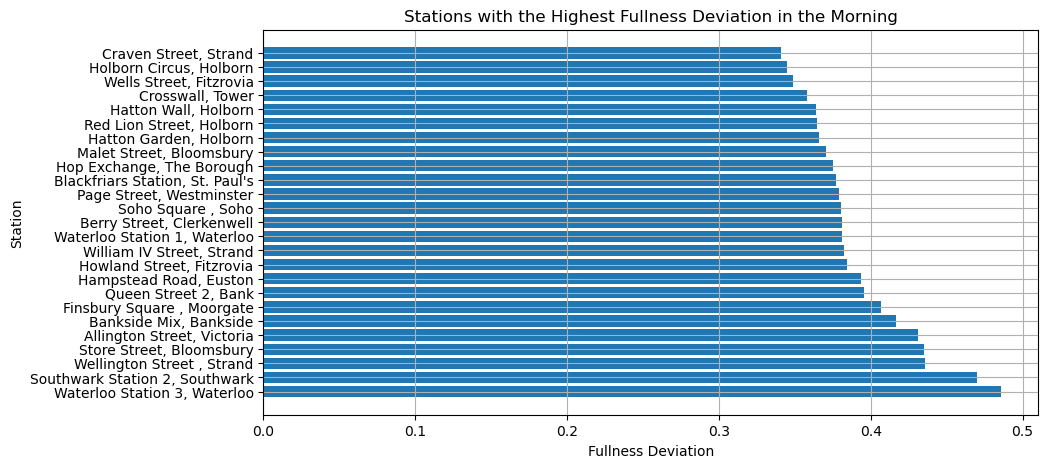

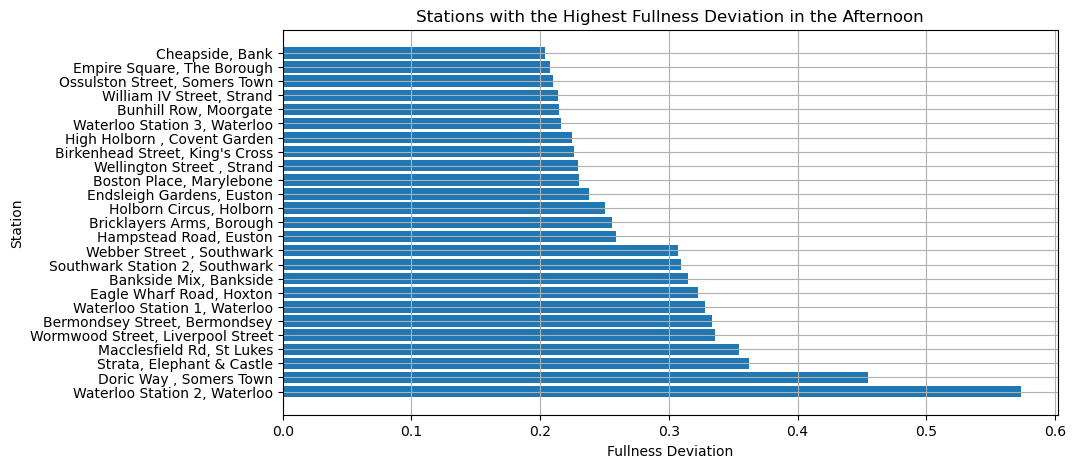

In [27]:
plt.figure(figsize=(10, 5))
plt.barh(morning_data_top15['station'], morning_data_top15['fullness_deviation'])
plt.title('Stations with the Highest Fullness Deviation in the Morning')
plt.xlabel('Fullness Deviation')
plt.ylabel('Station')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(afternoon_data_top15['station'], afternoon_data_top15['fullness_deviation'])
plt.title('Stations with the Highest Fullness Deviation in the Afternoon')
plt.xlabel('Fullness Deviation')
plt.ylabel('Station')
plt.grid(True)
plt.show()
